In [1]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import load_model
import librosa
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
classifier = load_model('my_model.h5')

In [3]:
import sounddevice as sd
from scipy.io.wavfile import write
import os

In [4]:
fs = 44100  # this is the frequency sampling; also: 4999, 64000
seconds = 1.5
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
print("Starting: Speak now!")
sd.wait()  # Wait until recording is finished
print("finished")
write('output.wav', fs, myrecording) 

Starting: Speak now!
finished


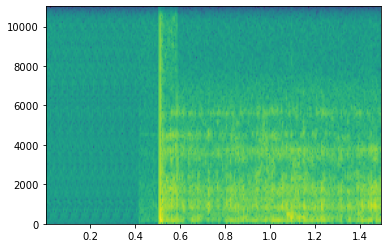

In [5]:
fig, ax = plt.subplots()
x, sr = librosa.load(r".\output.wav")
plt.specgram(x,Fs=sr)
fig.savefig(r'.\56.png')

In [6]:
test_image = image.load_img(r'.\56.png', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
#training_set.class_indices
if result[0][0] == 1: 
    prediction = 'hppy'
else:
    prediction = 'fer'
print(prediction)

fer
